<a href="https://colab.research.google.com/github/bmnds/uea-data-science-04-data-processing/blob/main/%5BAula03%5D_Sele%C3%A7%C3%A3o_de_Atributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata as ud

# Análise de texto

In [ ]:
!pip install textdistance
import textdistance
import editdistance

In [ ]:
def calculate_string_distance(str1, str2):
  print(f'Calculating distance between `{str1}` and `{str2}`')

  editdist = editdistance.eval(str1, str2)
  print("Edit distance: ", editdist)

  jaro = textdistance.jaro(str1, str2)
  print("Jaro: ", jaro)

  hamming = textdistance.hamming(str1, str2)
  print("Hamming: ", hamming)

  hammingDist = textdistance.hamming.distance(str1, str2)
  print("Hamming distance: ", hammingDist)

  hammingSim = textdistance.hamming.similarity(str1, str2)
  print("Hamming similarity: ", hammingSim)

  hammingNDist = textdistance.hamming.normalized_distance(str1, str2)
  print("Hamming normalized distance: ", hammingNDist)

  hammingNSim = textdistance.hamming.normalized_similarity(str1, str2)
  print("Hamming normaliozed similarity: ", hammingNSim)

  hammingDistQ = textdistance.Hamming(qval=2).distance(str1, str2)
  print("Hamming distance q: ", hammingDistQ)
  print("")

In [ ]:
def calculate_n_grams(str1, str2):
  print(f'Calculating n grams for `{str1}` and `{str2}`')

  jaccard = textdistance.jaccard(str1, str2)
  print(f'Jaccard {jaccard}')

  sorensen = textdistance.sorensen_dice(str1, str2)
  print(f'Sorensen {sorensen}')

  print('')

In [ ]:
def normalize_string(str):
  return ud.normalize('NFKD', str.lower()).encode('ASCII', 'ignore')

In [ ]:
calculate_string_distance('carros', 'carros')
calculate_string_distance('carros', 'caros')
calculate_string_distance('carros', 'Carros')
calculate_string_distance('carros', 'karros')
calculate_string_distance('carros', 'carrôs')
calculate_string_distance('fernao dias paes lemos', 'Fernão Dias Pais Lemes')
calculate_string_distance('levá-lo-á', 'levar ele a')


Calculating distance between `carros` and `carros`
Edit distance:  0
Jaro:  1
Hamming:  0
Hamming distance:  0
Hamming similarity:  6
Hamming normalized distance:  0.0
Hamming normaliozed similarity:  1.0
Hamming distance q:  0

Calculating distance between `carros` and `caros`
Edit distance:  1
Jaro:  0.9444444444444445
Hamming:  3
Hamming distance:  3
Hamming similarity:  3
Hamming normalized distance:  0.5
Hamming normaliozed similarity:  0.5
Hamming distance q:  3

Calculating distance between `carros` and `Carros`
Edit distance:  1
Jaro:  0.888888888888889
Hamming:  1
Hamming distance:  1
Hamming similarity:  5
Hamming normalized distance:  0.16666666666666666
Hamming normaliozed similarity:  0.8333333333333334
Hamming distance q:  1

Calculating distance between `carros` and `karros`
Edit distance:  1
Jaro:  0.888888888888889
Hamming:  1
Hamming distance:  1
Hamming similarity:  5
Hamming normalized distance:  0.16666666666666666
Hamming normaliozed similarity:  0.833333333333333

In [ ]:
calculate_n_grams('carros', 'carros')
calculate_n_grams('carros', 'caros')
calculate_n_grams('carros', 'Carros')
calculate_n_grams('carros', 'karros')
calculate_n_grams('carros', 'carrôs')
calculate_n_grams('fernao dias paes lemos', 'Fernão Dias Pais Lemes')
calculate_n_grams('levá-lo-á', 'levar ele a')

Calculating n grams for `carros` and `carros`
Jaccard 1
Sorensen 1

Calculating n grams for `carros` and `caros`
Jaccard 0.8333333333333334
Sorensen 0.9090909090909091

Calculating n grams for `carros` and `Carros`
Jaccard 0.7142857142857143
Sorensen 0.8333333333333334

Calculating n grams for `carros` and `karros`
Jaccard 0.7142857142857143
Sorensen 0.8333333333333334

Calculating n grams for `carros` and `carrôs`
Jaccard 0.7142857142857143
Sorensen 0.8333333333333334

Calculating n grams for `fernao dias paes lemos` and `Fernão Dias Pais Lemes`
Jaccard 0.5714285714285714
Sorensen 0.7272727272727273

Calculating n grams for `levá-lo-á` and `levar ele a`
Jaccard 0.25
Sorensen 0.4



In [ ]:
def normalize_string(str):
  return ud.normalize('NFKD', str.lower()).encode('ASCII', 'ignore')
  
str1 = 'fernao dias paes lemos'
str2 = 'Fernão Dias Pais Leme'

norm_str1 = normalize_string(str1).split()
norm_str2 = normalize_string(str2).split()

calculate_string_distance(norm_str1, norm_str2)
calculate_n_grams(norm_str1, norm_str2)

Calculating distance between `[b'fernao', b'dias', b'paes', b'lemos']` and `[b'fernao', b'dias', b'pais', b'leme']`
Edit distance:  2
Jaro:  0.6666666666666666
Hamming:  2
Hamming distance:  2
Hamming similarity:  2
Hamming normalized distance:  0.5
Hamming normaliozed similarity:  0.5
Hamming distance q:  2

Calculating n grams for `[b'fernao', b'dias', b'paes', b'lemos']` and `[b'fernao', b'dias', b'pais', b'leme']`
Jaccard 0.3333333333333333
Sorensen 0.5



# Análise de importância de features
Dataset `pima-indians-diabetes`

In [ ]:
# Baixando o(s) dataset(s)
%%time
!curl -o 'pima-indians-diabetes.csv' -s -OL 'https://drive.google.com/uc?export=download&id=1ToYD0GPtvy2BY9f1mPeexLeWFFgCcDY3'

CPU times: user 7.25 ms, sys: 3.85 ms, total: 11.1 ms
Wall time: 627 ms


Metadados:

|Coluna|Descrição|
|---|---|
|preg|Número de vezes que grávida|
|plas|Concentração de glicose plasmática a 2 horas em um teste de tolerância oral à glicose|
|pres|pressão arterial diastólica (mm Hg)|
|skin|espessura da dobra da pele do tríceps (mm)|
|test|insulina sérica de 2 horas (mu U / ml)|
|mass|índice de massa corporal (peso em kg / (altura em m) ^ 2)|
|pedi|função de pedigree de diabetes|
|age|idade (anos)|
|class|Classe: 1 - positivo para diabetes; 2 - negativo para diabetes|


In [ ]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.sample(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
194,8,85,55,20,0,24.4,0.136,42,0
136,0,100,70,26,50,30.8,0.597,21,0
505,10,75,82,0,0,33.3,0.263,38,0
275,2,100,70,52,57,40.5,0.677,25,0
752,3,108,62,24,0,26.0,0.223,25,0
757,0,123,72,0,0,36.3,0.258,52,1
539,3,129,92,49,155,36.4,0.968,32,1
106,1,96,122,0,0,22.4,0.207,27,0
383,1,90,62,18,59,25.1,1.268,25,0
2,8,183,64,0,0,23.3,0.672,32,1


In [11]:
array_n = df.values
X = array_n[:,0:8]
Y = array_n[:,8]

array([[7129300520, '20141013T000000', 3, ..., 0, 0, 3],
       [6414100192, '20141209T000000', 3, ..., 0, 0, 3],
       [5631500400, '20150225T000000', 2, ..., 0, 0, 3],
       ...,
       [1523300141, '20140623T000000', 2, ..., 0, 0, 3],
       [291310100, '20150116T000000', 3, ..., 0, 0, 3],
       [1523300157, '20141015T000000', 2, ..., 0, 0, 3]], dtype=object)

Features sorted by their score:
[(0.3322, 'plas'), (0.1677, 'mass'), (0.1259, 'pedi'), (0.1173, 'age'), (0.0876, 'pres'), (0.0678, 'preg'), (0.0528, 'test'), (0.0487, 'skin')]


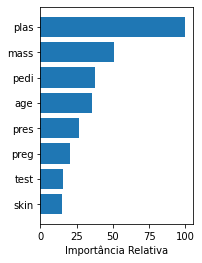

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X,Y)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), 
                      rf.feature_importances_), 
                  df.columns), 
              reverse=True))

feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
m_name = np.array(df.columns)
plt.yticks(pos, m_name[sorted_idx])
plt.xlabel('Importância Relativa')
plt.show()


Features sorted by their scores:
[(2175.5653, 'test'), (1411.887, 'plas'), (181.3037, 'age'), (127.6693, 'mass'), (111.5197, 'preg'), (53.108, 'skin'), (17.6054, 'pres'), (5.3927, 'pedi')]


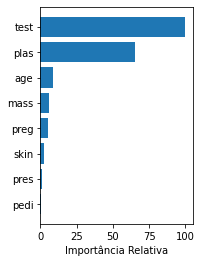

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

np.set_printoptions(precision=3)
#print(fit.scores_)

features = fit.transform(X)
#print(features[0:5,:])

print("Features sorted by their scores:")
print(sorted(zip(map(lambda x: round(x, 4), fit.scores_), 
                 df.columns), 
             reverse=True))

feature_importance = fit.scores_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
m_name = np.array(df.columns)
plt.yticks(pos, m_name[sorted_idx])
plt.xlabel('Importância Relativa')
plt.show()

Analyzing for k=1
Features sorted by their scores:
[(0.1148, 'plas'), (0.0731, 'mass'), (0.0559, 'age'), (0.0356, 'preg'), (0.0347, 'test'), (0.0165, 'pedi'), (0.0164, 'skin'), (0.0, 'pres')]



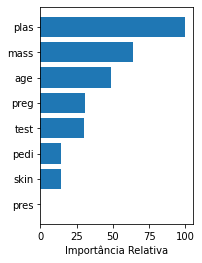

Analyzing for k=2
Features sorted by their scores:
[(0.1025, 'plas'), (0.0849, 'mass'), (0.0791, 'age'), (0.0568, 'test'), (0.0535, 'preg'), (0.0077, 'pedi'), (0.0043, 'pres'), (0.0, 'skin')]



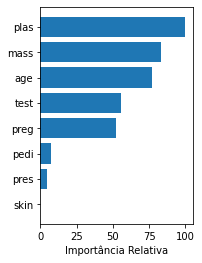

Analyzing for k=3
Features sorted by their scores:
[(0.1301, 'plas'), (0.097, 'mass'), (0.0727, 'age'), (0.0456, 'skin'), (0.0232, 'preg'), (0.0231, 'test'), (0.0093, 'pedi'), (0.0, 'pres')]



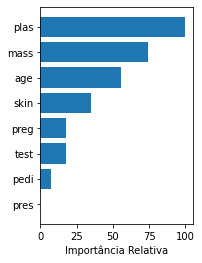

Analyzing for k=4
Features sorted by their scores:
[(0.1232, 'plas'), (0.0746, 'mass'), (0.0403, 'test'), (0.0381, 'age'), (0.0252, 'skin'), (0.0162, 'preg'), (0.013, 'pedi'), (0.0, 'pres')]



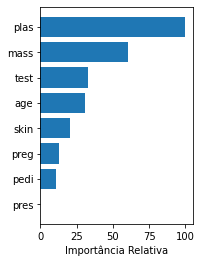

Analyzing for k=all
Features sorted by their scores:
[(0.1104, 'plas'), (0.0939, 'mass'), (0.0518, 'age'), (0.0266, 'preg'), (0.0111, 'test'), (0.0095, 'pedi'), (0.007, 'skin'), (0.0, 'pres')]



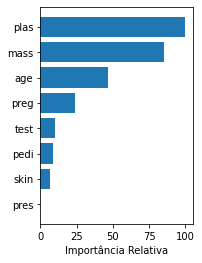

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# mutual_info_classif

def select_kbest(k):
  print(f'Analyzing for k={k}')
  test = SelectKBest(score_func=mutual_info_classif, k=k)
  fit = test.fit(X, Y)

  np.set_printoptions(precision=3)
  #print(fit.scores_)

  features = fit.transform(X)
  #print(features[0:5,:])

  print("Features sorted by their scores:")
  print(sorted(zip(map(lambda x: round(x, 4), fit.scores_), 
                  df.columns), 
              reverse=True))
  print('')
  feature_importance = fit.scores_
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + 0.5
  plt.subplot(1,2,2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  m_name = np.array(df.columns)
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

select_kbest(1)
select_kbest(2)
select_kbest(3)
select_kbest(4)
select_kbest('all')



Features sorted by their scores:
[(213.1618, 'plas'), (71.7721, 'mass'), (46.1406, 'age'), (39.6702, 'preg'), (23.8713, 'pedi'), (13.2811, 'test'), (4.3044, 'skin'), (3.257, 'pres')]



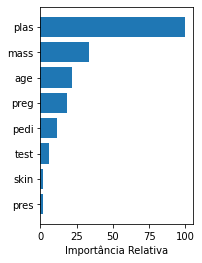

In [ ]:
from sklearn.feature_selection import SelectFdr
# mutual_info_classif

def select_fdr(c, fun):
  #print(f'Analyzing for alpha={a}')
  test = c()
  fit = test.fit(X, Y)

  np.set_printoptions(precision=3)
  #print(fit.scores_)

  #features = fit.transform(X)
  features = test.fit_transform(X, Y)
  #print(features[0:5,:])
  
  print("Features sorted by their scores:")
  print(sorted(zip(map(lambda x: round(x, 4), fit.scores_), 
                  df.columns), 
              reverse=True))
  print('')
  feature_importance = fit.scores_
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + 0.5
  plt.subplot(1,2,2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  m_name = np.array(df.columns)
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

select_fdr(SelectFdr, chi2)